In [ ]:
# 运行本ipynb文件前应利用魔搭社区或使用git获得llama3的预训练模型权重、分词器等相关信息
# 或自行修改加载客制化模型
# 另本教程参考https://github.com/naklecha/llama3-from-scratch.git
# git clone https://www.modelscope.cn/pooka74/LLaMA3-8B-Chat-Chinese.git llama3中文版预训练参数下载

In [1]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("../Llama3-8B-Chinese-Chat")
tokenizer

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


PreTrainedTokenizerFast(name_or_path='../Llama3-8B-Chinese-Chat', vocab_size=128000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|begin_of_text|>', 'eos_token': '<|eot_id|>', 'pad_token': '<|eot_id|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	128000: AddedToken("<|begin_of_text|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128001: AddedToken("<|end_of_text|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128002: AddedToken("<|reserved_special_token_0|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128003: AddedToken("<|reserved_special_token_1|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128004: AddedToken("<|reserved_special_token_2|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	12

In [2]:
tokenizer("今天天气真好！")

{'input_ids': [110916, 36827, 102146, 89151, 53901, 6447], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [3]:
tokens = tokenizer.tokenize('我爱中华大地')
print(tokens)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)
sentence = tokenizer.decode(ids)
print(sentence)

['æĪĳ', 'çĪ±', 'ä¸Ńåįİ', 'å¤§', 'åľ°']
[37046, 103312, 119635, 27384, 30590]
我爱中华大地


In [61]:
from safetensors.torch import load_file 
import json
model = load_file("../Llama3-8B-Chinese-Chat/model-00001-of-00004.safetensors")
model.update(load_file("../Llama3-8B-Chinese-Chat/model-00002-of-00004.safetensors"))
model.update(load_file("../Llama3-8B-Chinese-Chat/model-00003-of-00004.safetensors"))
model.update(load_file("../Llama3-8B-Chinese-Chat/model-00004-of-00004.safetensors"))
print(json.dumps(list(model.keys())[:], indent=4))

[
    "model.embed_tokens.weight",
    "model.layers.0.input_layernorm.weight",
    "model.layers.0.mlp.down_proj.weight",
    "model.layers.0.mlp.gate_proj.weight",
    "model.layers.0.mlp.up_proj.weight",
    "model.layers.0.post_attention_layernorm.weight",
    "model.layers.0.self_attn.k_proj.weight",
    "model.layers.0.self_attn.o_proj.weight",
    "model.layers.0.self_attn.q_proj.weight",
    "model.layers.0.self_attn.v_proj.weight",
    "model.layers.1.input_layernorm.weight",
    "model.layers.1.mlp.down_proj.weight",
    "model.layers.1.mlp.gate_proj.weight",
    "model.layers.1.mlp.up_proj.weight",
    "model.layers.1.post_attention_layernorm.weight",
    "model.layers.1.self_attn.k_proj.weight",
    "model.layers.1.self_attn.o_proj.weight",
    "model.layers.1.self_attn.q_proj.weight",
    "model.layers.1.self_attn.v_proj.weight",
    "model.layers.2.input_layernorm.weight",
    "model.layers.2.mlp.down_proj.weight",
    "model.layers.2.mlp.gate_proj.weight",
    "model.lay

In [6]:
with open("../Llama3-8B-Chinese-Chat/config.json", "r") as f:
    config = json.load(f)
config

{'architectures': ['LlamaForCausalLM'],
 'attention_bias': False,
 'attention_dropout': 0.0,
 'bos_token_id': 128000,
 'eos_token_id': 128009,
 'hidden_act': 'silu',
 'hidden_size': 4096,
 'initializer_range': 0.02,
 'intermediate_size': 14336,
 'max_position_embeddings': 8192,
 'model_type': 'llama',
 'num_attention_heads': 32,
 'num_hidden_layers': 32,
 'num_key_value_heads': 8,
 'pretraining_tp': 1,
 'rms_norm_eps': 1e-05,
 'rope_scaling': None,
 'rope_theta': 500000.0,
 'tie_word_embeddings': False,
 'torch_dtype': 'bfloat16',
 'transformers_version': '4.40.0',
 'use_cache': True,
 'vocab_size': 128256}

In [8]:
import torch
prompt = "the answer to the ultimate question of life, the universe, and everything is "
print(tokenizer.tokenize(prompt))
print(tokenizer(prompt))
tokens = [128000] + tokenizer.convert_tokens_to_ids(tokenizer.tokenize(prompt))
print(tokens)
tokens = torch.tensor(tokens)
prompt_split_as_tokens = [tokenizer.decode([token.item()]) for token in tokens]
print(prompt_split_as_tokens)

['the', 'Ġanswer', 'Ġto', 'Ġthe', 'Ġultimate', 'Ġquestion', 'Ġof', 'Ġlife', ',', 'Ġthe', 'Ġuniverse', ',', 'Ġand', 'Ġeverything', 'Ġis', 'Ġ']
{'input_ids': [1820, 4320, 311, 279, 17139, 3488, 315, 2324, 11, 279, 15861, 11, 323, 4395, 374, 220], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
[128000, 1820, 4320, 311, 279, 17139, 3488, 315, 2324, 11, 279, 15861, 11, 323, 4395, 374, 220]
['<|begin_of_text|>', 'the', ' answer', ' to', ' the', ' ultimate', ' question', ' of', ' life', ',', ' the', ' universe', ',', ' and', ' everything', ' is', ' ']


In [9]:
embedding_layer = torch.nn.Embedding(128256, 4096)
embedding_layer.weight.data.copy_(model["model.embed_tokens.weight"])
token_embeddings_unnormalized = embedding_layer(tokens).to(torch.bfloat16)
token_embeddings_unnormalized.shape

torch.Size([17, 4096])

In [10]:
# def rms_norm(tensor, norm_weights):
#     rms = (tensor.pow(2).mean(-1, keepdim=True) + norm_eps)**0.5
#     return tensor * (norm_weights / rms)
def rms_norm(tensor, norm_weights):
    return (tensor * torch.rsqrt(tensor.pow(2).mean(-1, keepdim=True) + 1e-05)) * norm_weights

In [11]:
token_embeddings = rms_norm(token_embeddings_unnormalized, model["model.layers.0.input_layernorm.weight"])
token_embeddings.shape

torch.Size([17, 4096])

In [12]:
print(
    model["model.layers.0.self_attn.q_proj.weight"].shape,
    model["model.layers.0.self_attn.k_proj.weight"].shape,
    model["model.layers.0.self_attn.v_proj.weight"].shape,
    model["model.layers.0.self_attn.o_proj.weight"].shape
)

torch.Size([4096, 4096]) torch.Size([1024, 4096]) torch.Size([1024, 4096]) torch.Size([4096, 4096])


In [13]:
q_layer0 = model["model.layers.0.self_attn.q_proj.weight"]
head_dim = q_layer0.shape[0] // 32
q_layer0 = q_layer0.view(32, head_dim, 4096)
q_layer0.shape

torch.Size([32, 128, 4096])

In [14]:
q_layer0_head0 = q_layer0[0]
q_layer0_head0.shape

torch.Size([128, 4096])

In [15]:
q_per_token = torch.matmul(token_embeddings, q_layer0_head0.T)
q_per_token.shape

torch.Size([17, 128])

In [16]:
q_per_token_split_into_pairs = q_per_token.float().view(q_per_token.shape[0], -1, 2)
q_per_token_split_into_pairs.shape

torch.Size([17, 64, 2])

In [17]:
zero_to_one_split_into_64_parts = torch.tensor(range(64))/64
print(zero_to_one_split_into_64_parts)
freqs = 1.0 / (500000.0 ** zero_to_one_split_into_64_parts)
print(freqs)

tensor([0.0000, 0.0156, 0.0312, 0.0469, 0.0625, 0.0781, 0.0938, 0.1094, 0.1250,
        0.1406, 0.1562, 0.1719, 0.1875, 0.2031, 0.2188, 0.2344, 0.2500, 0.2656,
        0.2812, 0.2969, 0.3125, 0.3281, 0.3438, 0.3594, 0.3750, 0.3906, 0.4062,
        0.4219, 0.4375, 0.4531, 0.4688, 0.4844, 0.5000, 0.5156, 0.5312, 0.5469,
        0.5625, 0.5781, 0.5938, 0.6094, 0.6250, 0.6406, 0.6562, 0.6719, 0.6875,
        0.7031, 0.7188, 0.7344, 0.7500, 0.7656, 0.7812, 0.7969, 0.8125, 0.8281,
        0.8438, 0.8594, 0.8750, 0.8906, 0.9062, 0.9219, 0.9375, 0.9531, 0.9688,
        0.9844])
tensor([1.0000e+00, 8.1462e-01, 6.6360e-01, 5.4058e-01, 4.4037e-01, 3.5873e-01,
        2.9223e-01, 2.3805e-01, 1.9392e-01, 1.5797e-01, 1.2869e-01, 1.0483e-01,
        8.5397e-02, 6.9566e-02, 5.6670e-02, 4.6164e-02, 3.7606e-02, 3.0635e-02,
        2.4955e-02, 2.0329e-02, 1.6560e-02, 1.3490e-02, 1.0990e-02, 8.9523e-03,
        7.2927e-03, 5.9407e-03, 4.8394e-03, 3.9423e-03, 3.2114e-03, 2.6161e-03,
        2.1311e-03, 1.7

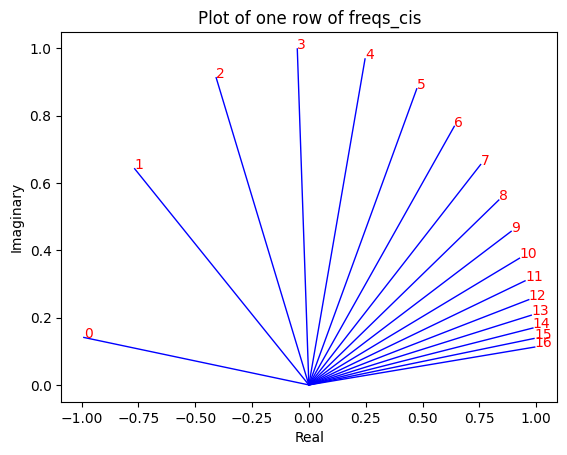

In [19]:
import matplotlib.pyplot as plt
freqs_for_each_token = torch.outer(torch.arange(17), freqs)
freqs_cis = torch.polar(torch.ones_like(freqs_for_each_token), freqs_for_each_token)
freqs_cis.shape

# viewing tjhe third row of freqs_cis
value = freqs_cis[3]
plt.figure()
for i, element in enumerate(value[:17]):
    plt.plot([0, element.real], [0, element.imag], color='blue', linewidth=1, label=f"Index: {i}")
    plt.annotate(f"{i}", xy=(element.real, element.imag), color='red')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Plot of one row of freqs_cis')
plt.show()

In [20]:
q_per_token_as_complex_numbers = torch.view_as_complex(q_per_token_split_into_pairs)
q_per_token_as_complex_numbers.shape

torch.Size([17, 64])

In [21]:
q_per_token_as_complex_numbers_rotated = q_per_token_as_complex_numbers * freqs_cis
q_per_token_as_complex_numbers_rotated.shape

torch.Size([17, 64])

In [32]:
q_per_token_split_into_pairs_rotated = torch.view_as_real(q_per_token_as_complex_numbers_rotated)
q_per_token_split_into_pairs_rotated.shape

torch.Size([17, 64, 2])

In [33]:
q_per_token_rotated = q_per_token_split_into_pairs_rotated.view(q_per_token.shape)
q_per_token_rotated.shape

torch.Size([17, 128])

In [24]:
k_layer0 = model["model.layers.0.self_attn.k_proj.weight"]
k_layer0 = k_layer0.view(8, k_layer0.shape[0] // 8, 4096)
k_layer0.shape

torch.Size([8, 128, 4096])

In [25]:
k_layer0_head0 = k_layer0[0]
k_layer0_head0.shape

torch.Size([128, 4096])

In [26]:
k_per_token = torch.matmul(token_embeddings, k_layer0_head0.T)
k_per_token.shape

torch.Size([17, 128])

In [27]:
k_per_token_split_into_pairs = k_per_token.float().view(k_per_token.shape[0], -1, 2)
k_per_token_split_into_pairs.shape

torch.Size([17, 64, 2])

In [28]:
k_per_token_as_complex_numbers = torch.view_as_complex(k_per_token_split_into_pairs)
k_per_token_as_complex_numbers.shape

torch.Size([17, 64])

In [29]:
k_per_token_split_into_pairs_rotated = torch.view_as_real(k_per_token_as_complex_numbers * freqs_cis)
k_per_token_split_into_pairs_rotated.shape

torch.Size([17, 64, 2])

In [30]:
k_per_token_rotated = k_per_token_split_into_pairs_rotated.view(k_per_token.shape)
k_per_token_rotated.shape

torch.Size([17, 128])

In [34]:
qk_per_token = torch.matmul(q_per_token_rotated, k_per_token_rotated.T)/(head_dim)**0.5
qk_per_token.shape

torch.Size([17, 17])

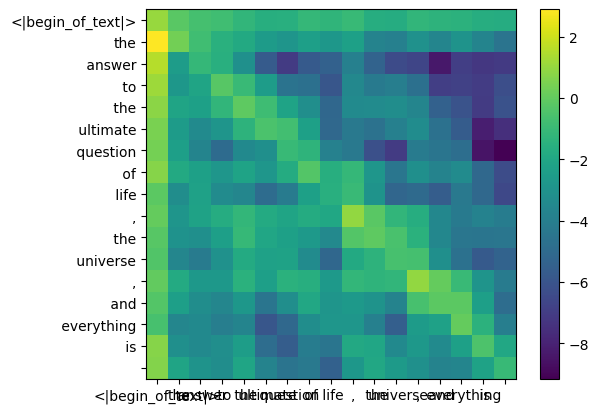

In [35]:
def display_qk_heatmap(qk_per_token):
    _, ax = plt.subplots()
    im = ax.imshow(qk_per_token.to(float).detach(), cmap='viridis')
    ax.set_xticks(range(len(prompt_split_as_tokens)))
    ax.set_yticks(range(len(prompt_split_as_tokens)))
    ax.set_xticklabels(prompt_split_as_tokens)
    ax.set_yticklabels(prompt_split_as_tokens)
    ax.figure.colorbar(im, ax=ax)
    
display_qk_heatmap(qk_per_token)

In [36]:
mask = torch.full((len(tokens), len(tokens)), float("-inf"), device=tokens.device)
mask = torch.triu(mask, diagonal=1)
mask

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -in

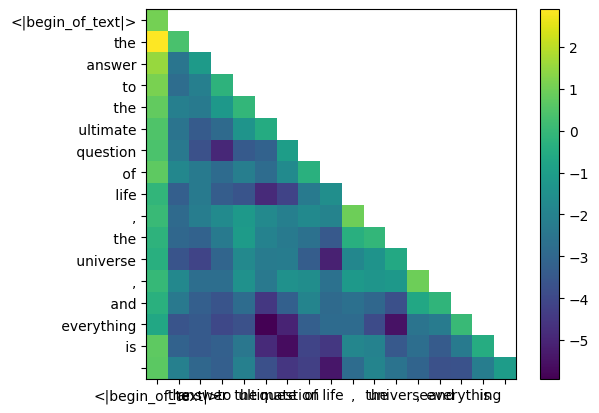

In [37]:
qk_per_token_after_masking = qk_per_token + mask
display_qk_heatmap(qk_per_token_after_masking)

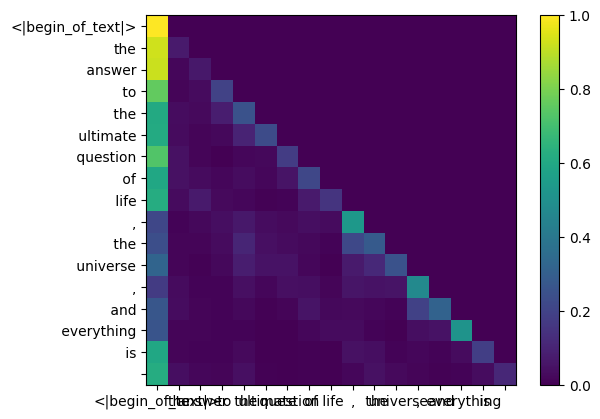

In [38]:
qk_per_token_after_masking_after_softmax = torch.nn.functional.softmax(qk_per_token_after_masking, dim=1).to(torch.bfloat16)
display_qk_heatmap(qk_per_token_after_masking_after_softmax)

In [40]:
v_layer0 = model["model.layers.0.self_attn.v_proj.weight"]
v_layer0 = v_layer0.view(8, v_layer0.shape[0] // 8, 4096)
v_layer0.shape

torch.Size([8, 128, 4096])

In [41]:
v_layer0_head0 = v_layer0[0]
v_layer0_head0.shape

torch.Size([128, 4096])

In [42]:
v_per_token = torch.matmul(token_embeddings, v_layer0_head0.T)
v_per_token.shape

torch.Size([17, 128])

In [43]:
qkv_attention = torch.matmul(qk_per_token_after_masking_after_softmax, v_per_token)
qkv_attention.shape

torch.Size([17, 128])

In [46]:
qkv_attention_store = []

for head in range(32):
    q_layer0_head = q_layer0[head]
    k_layer0_head = k_layer0[head//4] # key weights are shared across 4 heads
    v_layer0_head = v_layer0[head//4] # value weights are shared across 4 heads
    q_per_token = torch.matmul(token_embeddings, q_layer0_head.T)
    k_per_token = torch.matmul(token_embeddings, k_layer0_head.T)
    v_per_token = torch.matmul(token_embeddings, v_layer0_head.T)

    q_per_token_split_into_pairs = q_per_token.float().view(q_per_token.shape[0], -1, 2)
    q_per_token_as_complex_numbers = torch.view_as_complex(q_per_token_split_into_pairs)
    q_per_token_split_into_pairs_rotated = torch.view_as_real(q_per_token_as_complex_numbers * freqs_cis[:len(tokens)])
    q_per_token_rotated = q_per_token_split_into_pairs_rotated.view(q_per_token.shape)

    k_per_token_split_into_pairs = k_per_token.float().view(k_per_token.shape[0], -1, 2)
    k_per_token_as_complex_numbers = torch.view_as_complex(k_per_token_split_into_pairs)
    k_per_token_split_into_pairs_rotated = torch.view_as_real(k_per_token_as_complex_numbers * freqs_cis[:len(tokens)])
    k_per_token_rotated = k_per_token_split_into_pairs_rotated.view(k_per_token.shape)

    qk_per_token = torch.matmul(q_per_token_rotated, k_per_token_rotated.T)/(128)**0.5
    mask = torch.full((len(tokens), len(tokens)), float("-inf"), device=tokens.device)
    mask = torch.triu(mask, diagonal=1)
    qk_per_token_after_masking = qk_per_token + mask
    qk_per_token_after_masking_after_softmax = torch.nn.functional.softmax(qk_per_token_after_masking, dim=1).to(torch.bfloat16)
    qkv_attention = torch.matmul(qk_per_token_after_masking_after_softmax, v_per_token)
    qkv_attention = torch.matmul(qk_per_token_after_masking_after_softmax, v_per_token)
    qkv_attention_store.append(qkv_attention)

qkv_attention_store

[tensor([[ 1.4587e-02,  5.9509e-04,  2.9541e-02,  ..., -2.4780e-02,
          -3.9368e-03,  7.0801e-02],
         [ 1.3550e-02, -3.0756e-05,  3.0762e-02,  ..., -2.3926e-02,
          -6.4392e-03,  6.0059e-02],
         [ 1.4038e-02,  6.9427e-04,  2.9053e-02,  ..., -2.1851e-02,
          -3.1738e-03,  6.4453e-02],
         ...,
         [ 5.9814e-03, -1.1230e-02,  2.0752e-02,  ..., -1.3611e-02,
          -1.2329e-02,  3.3447e-02],
         [ 1.3489e-02,  5.2185e-03,  2.6123e-02,  ..., -1.3733e-02,
          -1.0157e-04,  4.7363e-02],
         [ 1.5442e-02,  1.6403e-03,  2.3071e-02,  ..., -1.6479e-02,
          -6.8665e-03,  4.8584e-02]], dtype=torch.bfloat16,
        grad_fn=<MmBackward0>),
 tensor([[ 0.0146,  0.0006,  0.0295,  ..., -0.0248, -0.0039,  0.0708],
         [ 0.0129, -0.0004,  0.0317,  ..., -0.0234, -0.0081,  0.0532],
         [ 0.0136,  0.0003,  0.0299,  ..., -0.0223, -0.0049,  0.0603],
         ...,
         [-0.0025, -0.0018,  0.0276,  ..., -0.0029, -0.0093,  0.0310],
   

In [47]:
stacked_qkv_attention = torch.cat(qkv_attention_store, dim=-1)
stacked_qkv_attention.shape

torch.Size([17, 4096])

In [48]:
w_layer0 = model["model.layers.0.self_attn.o_proj.weight"]
w_layer0.shape

torch.Size([4096, 4096])

In [49]:
embedding_delta = torch.matmul(stacked_qkv_attention, w_layer0.T)
embedding_delta.shape

torch.Size([17, 4096])

In [50]:
embedding_after_edit = token_embeddings_unnormalized + embedding_delta
embedding_after_edit.shape

torch.Size([17, 4096])

In [52]:
embedding_after_edit_normalized = rms_norm(embedding_after_edit, model["model.layers.0.post_attention_layernorm.weight"])
embedding_after_edit_normalized.shape

torch.Size([17, 4096])

In [53]:
w1 = model["model.layers.0.mlp.gate_proj.weight"]
w2 = model["model.layers.0.mlp.down_proj.weight"]
w3 = model["model.layers.0.mlp.up_proj.weight"]
output_after_feedforward = torch.matmul(torch.functional.F.silu(torch.matmul(embedding_after_edit_normalized, w1.T)) * torch.matmul(embedding_after_edit_normalized, w3.T), w2.T)
output_after_feedforward.shape

torch.Size([17, 4096])

In [54]:
layer_0_embedding = embedding_after_edit+output_after_feedforward
layer_0_embedding.shape

torch.Size([17, 4096])

In [62]:
final_embedding = token_embeddings_unnormalized
for layer in range(32):
    qkv_attention_store = []
    layer_embedding_norm = rms_norm(final_embedding, model[f"model.layers.{layer}.input_layernorm.weight"])
    q_layer = model[f"model.layers.{layer}.self_attn.q_proj.weight"]
    q_layer = q_layer.view(32, q_layer.shape[0] // 32, 4096)
    k_layer = model[f"model.layers.{layer}.self_attn.k_proj.weight"]
    k_layer = k_layer.view(8, k_layer.shape[0] // 8, 4096)
    v_layer = model[f"model.layers.{layer}.self_attn.v_proj.weight"]
    v_layer = v_layer.view(8, v_layer.shape[0] // 8, 4096)
    w_layer = model[f"model.layers.{layer}.self_attn.o_proj.weight"]
    for head in range(32):
        q_layer_head = q_layer[head]
        k_layer_head = k_layer[head//4]
        v_layer_head = v_layer[head//4]
        
        q_per_token = torch.matmul(layer_embedding_norm, q_layer_head.T)
        k_per_token = torch.matmul(layer_embedding_norm, k_layer_head.T)
        v_per_token = torch.matmul(layer_embedding_norm, v_layer_head.T)
        
        q_per_token_split_into_pairs = q_per_token.float().view(q_per_token.shape[0], -1, 2)
        q_per_token_as_complex_numbers = torch.view_as_complex(q_per_token_split_into_pairs)
        q_per_token_split_into_pairs_rotated = torch.view_as_real(q_per_token_as_complex_numbers * freqs_cis)
        q_per_token_rotated = q_per_token_split_into_pairs_rotated.view(q_per_token.shape)
        
        k_per_token_split_into_pairs = k_per_token.float().view(k_per_token.shape[0], -1, 2)
        k_per_token_as_complex_numbers = torch.view_as_complex(k_per_token_split_into_pairs)
        k_per_token_split_into_pairs_rotated = torch.view_as_real(k_per_token_as_complex_numbers * freqs_cis)
        k_per_token_rotated = k_per_token_split_into_pairs_rotated.view(k_per_token.shape)
        
        qk_per_token = torch.matmul(q_per_token_rotated, k_per_token_rotated.T)/(128)**0.5
        mask = torch.full((len(token_embeddings_unnormalized), len(token_embeddings_unnormalized)), float("-inf"))
        mask = torch.triu(mask, diagonal=1)
        
        qk_per_token_after_masking = qk_per_token + mask
        qk_per_token_after_masking_after_softmax = torch.nn.functional.softmax(qk_per_token_after_masking, dim=1).to(torch.bfloat16)
        qkv_attention = torch.matmul(qk_per_token_after_masking_after_softmax, v_per_token)
        qkv_attention_store.append(qkv_attention)

    stacked_qkv_attention = torch.cat(qkv_attention_store, dim=-1)
    # w_layer = model[f"layers.{layer}.attention.wo.weight"]
    embedding_delta = torch.matmul(stacked_qkv_attention, w_layer.T)
    embedding_after_edit = final_embedding + embedding_delta
    embedding_after_edit_normalized = rms_norm(embedding_after_edit, model[f"model.layers.{layer}.post_attention_layernorm.weight"])
    w1 = model[f"model.layers.{layer}.mlp.gate_proj.weight"]
    w2 = model[f"model.layers.{layer}.mlp.down_proj.weight"]
    w3 = model[f"model.layers.{layer}.mlp.up_proj.weight"]
    output_after_feedforward = torch.matmul(torch.functional.F.silu(torch.matmul(embedding_after_edit_normalized, w1.T)) * torch.matmul(embedding_after_edit_normalized, w3.T), w2.T)
    final_embedding = embedding_after_edit+output_after_feedforward
    
final_embedding = rms_norm(final_embedding, model["model.norm.weight"])
final_embedding.shape

torch.Size([17, 4096])

In [64]:
model["lm_head.weight"].shape

torch.Size([128256, 4096])

In [65]:
logits = torch.matmul(final_embedding[-1], model["lm_head.weight"].T)
logits.shape

torch.Size([128256])

In [66]:
next_token = torch.argmax(logits, dim=-1)
next_token

tensor(2983)

In [67]:
tokenizer.decode([next_token.item()])

'42'

In [80]:
import numpy as np
q_length = []
q_r_length = []
for i in range(token_embeddings.shape[0]):
    q_length.append(np.linalg.norm(token_embeddings_unnormalized.detach().to(torch.float).numpy()[i]))
    q_r_length.append(np.linalg.norm(embedding_delta.detach().to(torch.float).numpy()[i]))
print(q_length)
print(q_r_length)

[0.45268548, 0.42763066, 0.51978886, 0.32976416, 0.34777606, 0.5869958, 0.49654818, 0.30836874, 0.47027594, 0.34596822, 0.34777606, 0.57844096, 0.34596822, 0.35964954, 0.53014666, 0.34876496, 0.3364351]
[3.6506994, 9.46519, 8.746158, 10.532458, 10.5204525, 10.4822235, 10.69296, 9.693582, 11.830906, 11.554615, 9.749052, 12.200924, 11.294086, 10.072041, 11.652654, 9.8893795, 10.8385515]
